In [4]:
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d
import alphashape
from shapely.geometry import Point, Polygon


In [5]:
def is_point_inside_polygon(point, polygon):
    return polygon.contains(Point(point[0], point[1]))

[[141.343   92.6816]
 [144.238   91.8672]
 [143.352   89.8844]
 [140.469   90.9137]
 [141.343   92.6816]]


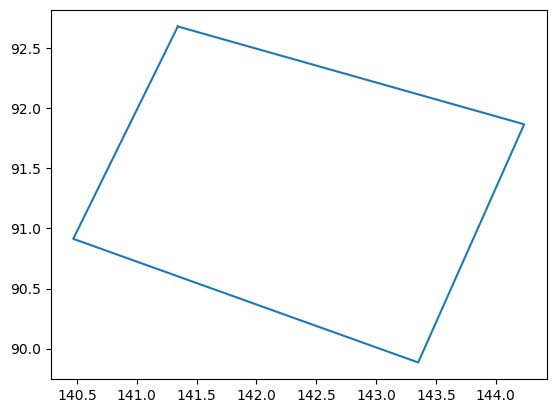

In [24]:
pcd = o3d.io.read_point_cloud("obst_Vertices_1.ply")
vertices = np.asarray(pcd.points)[:,:2] 
print(vertices)

plt.plot(vertices[:,0], vertices[:,1])
plt.show()

In [22]:

polygon = Polygon(vertices)
test_point = [140.9, 91.0]
print(is_point_inside_polygon(test_point, polygon))

True


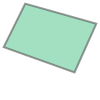

In [23]:
polygon

In [47]:
class PolygonMap:
    def __init__(self, boundary_ply, obstacle_ply_list):
        self.boundary = self.load_polygon(boundary_ply)
        self.obstacles = [self.load_polygon(ply) for ply in obstacle_ply_list]

    def load_polygon(self, ply_file):
        pcd = o3d.io.read_point_cloud(ply_file)
        vertices = np.asarray(pcd.points)[:, :2] 
        return Polygon(vertices)

    def is_valid_robot_pos(self, robot_polygon):

        robot_shape = Polygon(robot_polygon)

        if not robot_shape.within(self.boundary):
            return False, "Robot is outside the boundary"

        for obs in self.obstacles:
            if robot_shape.intersects(obs):
                return False, "Robot collides with an obstacle"

        return True, "Robot is in free space"

    def visualize(self, robot_polygon=None):
        fig, ax = plt.subplots(figsize=(8, 8))

        # Plot boundary
        bx, by = self.boundary.exterior.xy
        ax.plot(bx, by, 'b-', linewidth=2, label="Boundary")
        ax.fill(bx, by, 'cyan', alpha=0.2)

        # Plot obstacles
        for i, obs in enumerate(self.obstacles):
            ox, oy = obs.exterior.xy
            ax.plot(ox, oy, 'r-', linewidth=2)
            ax.fill(ox, oy, 'red', alpha=0.4)

        # Plot robot polygon
        if robot_polygon:
            rx, ry = zip(*robot_polygon) 
            ax.plot(rx + (rx[0],), ry + (ry[0],), 'g-', linewidth=2, label="Robot")  
            ax.fill(rx, ry, 'green', alpha=0.5)

        ax.legend()
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.title("Polygon Map with Obstacles and Robot")
        plt.grid(True)
        plt.show()


In [48]:

boundary_file = "milestone1_vertices.ply" 
obstacle_files = ["obst_Vertices_1.ply", "obst_Vertices_2.ply",'obst_Vertices_3.ply','obst_Vertices_4.ply', 'obst_Vertices_5.ply', 'obst_Vertices_6.ply', 'obst_Vertices_7_pots.ply', 'obst_Vertices_8_pots.ply', 'obst_Vertices_9_entrance.ply']

polygon_map = PolygonMap(boundary_file, obstacle_files)


(False, 'Robot collides with an obstacle')


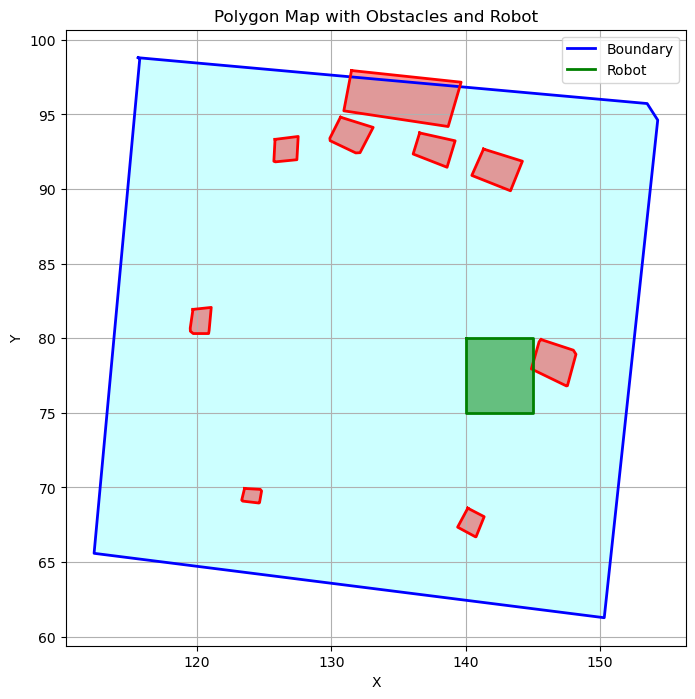

In [51]:

robot_footprint = [(140, 80), (145, 80), (145, 75), (140, 75)] 
print( polygon_map.is_valid_robot_pos(robot_footprint))
polygon_map.visualize(robot_footprint)

